In [1]:
import pandas as pd


In [2]:
df = pd.read_csv('dirty_iris.txt')


In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6.0,2.5,virginica
2,6.2,NaN,5.4,2.3,virginica
3,5.0,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1.0,versicolor


In [4]:
mn = df.shape
mn

(150, 5)

In [5]:
no_of_observation = mn[0] * mn[1]


In [6]:
no_of_incomplete_observation = df.isnull().sum().sum()


In [7]:
no_of_complete = no_of_observation- no_of_incomplete_observation
no_of_complete

692

In [8]:
per = no_of_complete/no_of_observation*100

In [9]:
per

92.26666666666667

In [10]:
df.fillna(value = 'NA').head()


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,6.4,3.2,4.5,1.5,versicolor
1,6.3,3.3,6,2.5,virginica
2,6.2,NA,5.4,2.3,virginica
3,5,3.4,1.6,0.4,setosa
4,5.7,2.6,3.5,1,versicolor


In [11]:
def species():
    for i in range(df['Species'].shape[0]):
        if df['Species'].iloc[i] not in( 'setosa' ,'virginica' ,'versicolor'):
            return False
    return True

In [12]:
species()

True

In [13]:
def positive():
    for i in range(len(df.columns)):
        if ((df[df.columns[i]]<0).sum())>0:
            print('First incorrect data in : ', df.columns[i])
            return False
    return True

In [14]:
positive()

First incorrect data in :  Sepal.Width


False

In [15]:
def pl_gt_2times_pw():
    pl = df['Petal.Length']
    pw = df['Petal.Width']
    
    for i in range(pl.shape[0]):
        if pl[i] < 2*pw[i]:
            print('First incorrect values: ')
            print("petal width: ", pw[i])
            print("petal length: ", pl[i])
            return False
        
    return True

In [16]:
pl_gt_2times_pw()


First incorrect values: 
petal width:  1.3
petal length:  0.82


False

In [17]:
def sl_lt_30():
    sl = df['Sepal.Length']
    result = sl<30
    print('there are "%d" number of sepallength example with value less than 30 '%sum(result))

In [19]:
sl_lt_30()

there are "138" number of sepallength example with value less than 30 


In [20]:
def sl_gt_pl():
    '''
        sepal length must be greater than petal length
    '''
    sl = df['Sepal.Length']
    pl = df['Petal.Length']
    result = sl<pl
    print('there are "%d" number of sepal length example with value less than petal length '%sum(result))

In [21]:
sl_gt_pl()

there are "2" number of sepal length example with value less than petal length 


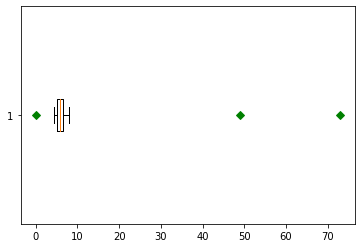

In [22]:
import matplotlib.pyplot as plt
import numpy as np
mean = np.mean(df['Sepal.Length'])
sepal_data = df['Sepal.Length'].fillna(mean)
%matplotlib inline
plot = plt.boxplot(sepal_data,0,'gD',showbox=True,vert=False,)
# plt.ylim(0,10)